In [3]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import load_digits
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

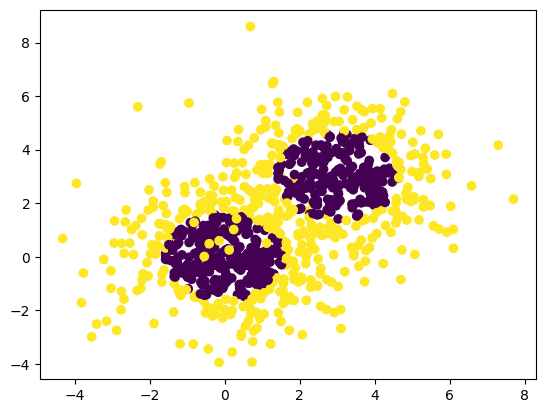

In [ ]:
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, 
random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=2,n_samples=400, n_features=2, n_classes=2, 
random_state=1)

#将两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

#通过可视化观察分类数据，它有两个特征，两个输出类别，用颜色区别。 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [4]:
# 定义一个算法为"SAMME"，弱分类器数量为 100，学习率为 0.8 的 AdaBoostClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, 
min_samples_leaf=5),
 algorithm="SAMME",n_estimators=100, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                           

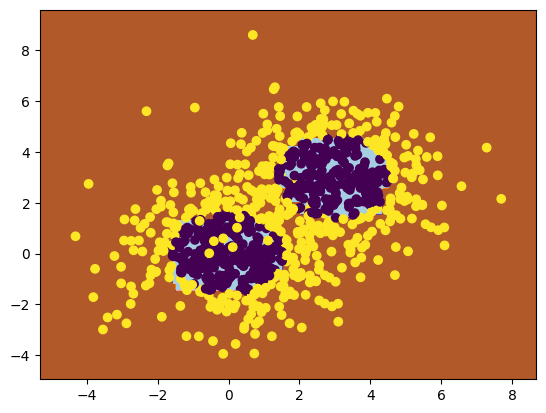

In [5]:
#拟合后，我们用网格图来看看它拟合的区域。
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
 np.arange(y_min, y_max, 0.02))
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [6]:
print("Score: %.2f" % bdt.score(X,y))

Score: 0.95


In [7]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, 
min_samples_leaf=5),
 algorithm="SAMME",n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score: %.2f" % bdt.score(X,y))

Score: 0.97


In [8]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, 
min_samples_leaf=5),
 algorithm="SAMME",n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score: %.2f" % bdt.score(X,y))


Score: 0.93


In [9]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, 
min_samples_leaf=5), 
algorithm="SAMME",n_estimators=600, learning_rate=0.7) 	
bdt.fit(X, y) 
print("Score: %.2f" % bdt.score(X,y))


Score: 0.97


In [11]:
digits = load_digits()
X_train,X_test,y_train,y_test = model_selection.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)


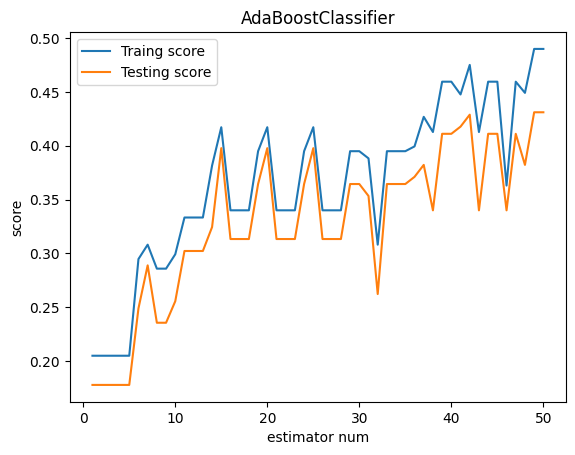

In [12]:
clf=AdaBoostClassifier(learning_rate=0.1,algorithm="SAMME")
clf.fit(X_train,y_train)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
estimators_num=len(clf.estimators_)
X=range(1,estimators_num+1)
ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
ax.set_xlabel("estimator num")
ax.set_ylabel("score")
ax.legend(loc="best")
ax.set_title("AdaBoostClassifier")
plt.show()

正在执行 learning_rates 为0.01
正在执行 learning_rates 为0.03
正在执行 learning_rates 为0.05
正在执行 learning_rates 为0.07
正在执行 learning_rates 为0.09
正在执行 learning_rates 为0.11
正在执行 learning_rates 为0.13
正在执行 learning_rates 为0.15
正在执行 learning_rates 为0.17
正在执行 learning_rates 为0.19
正在执行 learning_rates 为0.21
正在执行 learning_rates 为0.23
正在执行 learning_rates 为0.25
正在执行 learning_rates 为0.27
正在执行 learning_rates 为0.29
正在执行 learning_rates 为0.31
正在执行 learning_rates 为0.33
正在执行 learning_rates 为0.35
正在执行 learning_rates 为0.37
正在执行 learning_rates 为0.39
正在执行 learning_rates 为0.41
正在执行 learning_rates 为0.43
正在执行 learning_rates 为0.45
正在执行 learning_rates 为0.47
正在执行 learning_rates 为0.49
正在执行 learning_rates 为0.52
正在执行 learning_rates 为0.54
正在执行 learning_rates 为0.56
正在执行 learning_rates 为0.58
正在执行 learning_rates 为0.60
正在执行 learning_rates 为0.62
正在执行 learning_rates 为0.64
正在执行 learning_rates 为0.66
正在执行 learning_rates 为0.68
正在执行 learning_rates 为0.70
正在执行 learning_rates 为0.72
正在执行 learning_rates 为0.74
正在执行 learning_rates 为0.76
正在执行 learnin

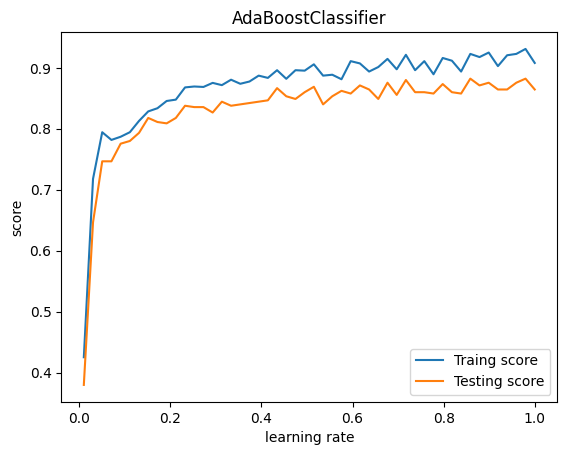

In [13]:
learning_rates=np.linspace(0.01,1)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
traing_scores=[]
testing_scores=[]
for learning_rate in learning_rates:
 print("正在执行 learning_rates 为{:.2f}".format(learning_rate))
 clf=AdaBoostClassifier(algorithm="SAMME",learning_rate=learning_rate,n_estimators=500)
 clf.fit(X_train,y_train)
 traing_scores.append(clf.score(X_train,y_train))
 testing_scores.append(clf.score(X_test,y_test))
ax.plot(learning_rates,traing_scores,label="Traing score")
ax.plot(learning_rates,testing_scores,label="Testing score")
ax.set_xlabel("learning rate")
ax.set_ylabel("score")
ax.legend(loc="best")
ax.set_title("AdaBoostClassifier")
plt.show()

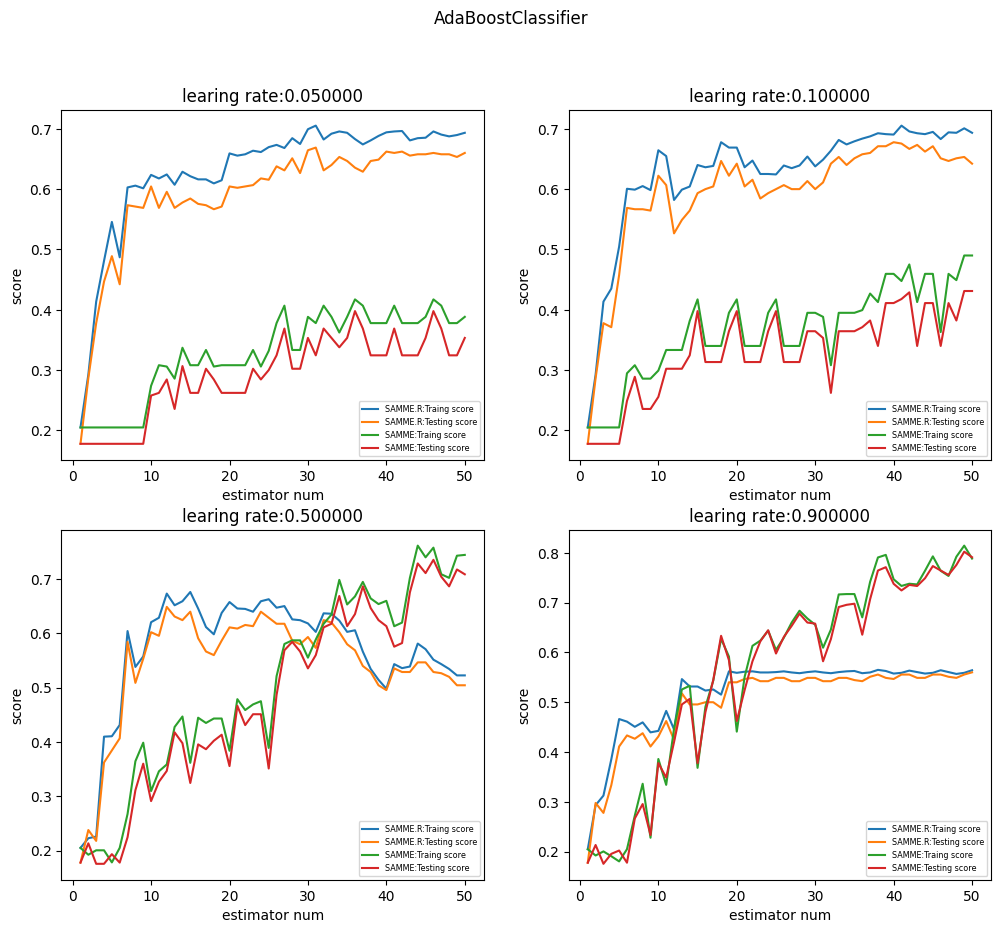

In [6]:
digits = load_digits()
X_train,X_test,y_train,y_test = model_selection.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)
algorithms=['SAMME.R','SAMME']
fig=plt.figure()
fig.set_size_inches(12,10)
learning_rates=[0.05,0.1,0.5,0.9]
for i,learning_rate in enumerate(learning_rates):
    ax=fig.add_subplot(2,2,i+1)
    for i ,algorithm in enumerate(algorithms):
        clf=AdaBoostClassifier(learning_rate=learning_rate,algorithm=algorithm)
        clf.fit(X_train,y_train)
        estimators_num=len(clf.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="%s:Traing score"%algorithms[i])
        ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="%s:Testing score"%algorithms[i])
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right",fontsize='xx-small')
    ax.set_title("learing rate:%f"%learning_rate)
fig.suptitle("AdaBoostClassifier")
plt.show()